In [1]:
import pandas as pd
import numpy as np

In [2]:
# load in data
data = './preprocessed_stats_22024.csv'
df = pd.read_csv(data)
df.head()

,PLAYER_ID,minutes,fieldGoalsMade,fieldGoalsAttempted,fieldGoalsPercentage,threePointersMade,threePointersAttempted,threePointersPercentage,freeThrowsMade,freeThrowsAttempted,...,ROLLING_total_shots,ROLLING_total_makes,ROLLING_fg_pct,ROLLING_paint_shots,ROLLING_mid_range_shots,ROLLING_three_point_shots,ROLLING_avg_distance,position_encoded,days_since,opposing_team_numeric
0,2544,34.650000,1.233608,1.512782,0.351239,0.011294,0.398308,0.143403,-0.112656,-0.241158,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1,108,0
1,2544,34.700000,1.233608,1.033081,0.704013,0.701195,0.717424,0.680328,1.859488,2.569032,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1,111,1
2,2544,33.766667,2.780866,2.472183,0.728707,2.080997,1.993885,0.837826,1.366452,0.963209,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1,112,2
3,2544,35.800000,-0.004199,1.192981,-0.438974,0.701195,0.717424,0.680328,0.873416,1.766121,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1,114,1
4,2544,28.966667,1.852511,1.033081,1.247285,0.011294,0.079193,0.440502,2.845561,2.167577,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1,116,3


In [3]:
# drop players with no minutes in the game
df_clean = df.dropna()

In [4]:
for col in df_clean.columns:
    print(col)

PLAYER_ID
minutes
fieldGoalsMade
fieldGoalsAttempted
fieldGoalsPercentage
threePointersMade
threePointersAttempted
threePointersPercentage
freeThrowsMade
freeThrowsAttempted
freeThrowsPercentage
reboundsOffensive
reboundsDefensive
reboundsTotal
assists
steals
blocks
turnovers
foulsPersonal
points
plusMinusPoints
GAME_ID
SEASON_ID
TEAM_ID
GAME_ID_game
WL
MIN
PTS
FGM
FGA
FG_PCT
FG3M
FG3A
FG3_PCT
FTM
FTA
FT_PCT
OREB
DREB
REB
AST
STL
BLK
TOV
PF
PLUS_MINUS
total_shots
total_makes
fg_pct
paint_shots
mid_range_shots
three_point_shots
avg_distance
total_shots_clutch
total_makes_clutch
fg_pct_clutch
paint_shots_clutch
mid_range_shots_clutch
three_point_shots_clutch
avg_distance_clutch
efg
ts
streak
usagePercentage
ROLLING_fieldGoalsMade
ROLLING_fieldGoalsAttempted
ROLLING_fieldGoalsPercentage
ROLLING_threePointersMade
ROLLING_threePointersAttempted
ROLLING_threePointersPercentage
ROLLING_freeThrowsMade
ROLLING_freeThrowsAttempted
ROLLING_freeThrowsPercentage
ROLLING_reboundsOffensive
ROLLING_re

In [5]:
# split data
from sklearn.model_selection import train_test_split

target = ['WL']
X = df_clean.drop(columns=target)
y = df_clean[target]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (9522, 113)
Testing set size: (2381, 113)


## Binary Regression

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

model = LinearRegression()

# train model
model.fit(X_train, y_train)

# test_model
y_pred = model.predict(X_test)


In [8]:
# evaluate model
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.05871728595927301
R-squared: 0.7649218253948304
Mean Absolute Error: 0.19864256473192424


In [9]:
# analyze feature weightings
coefs = model.coef_[0]

feature_names = X_train.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})
coef_df['Magnitude'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Magnitude', ascending=False)

coef_df.to_csv('feature_weights_regression.csv', index=False)

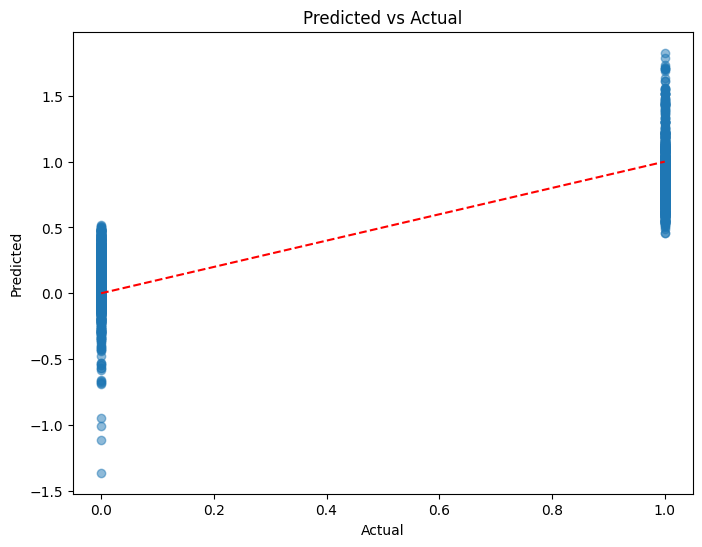

In [10]:
# plot regression
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.show()

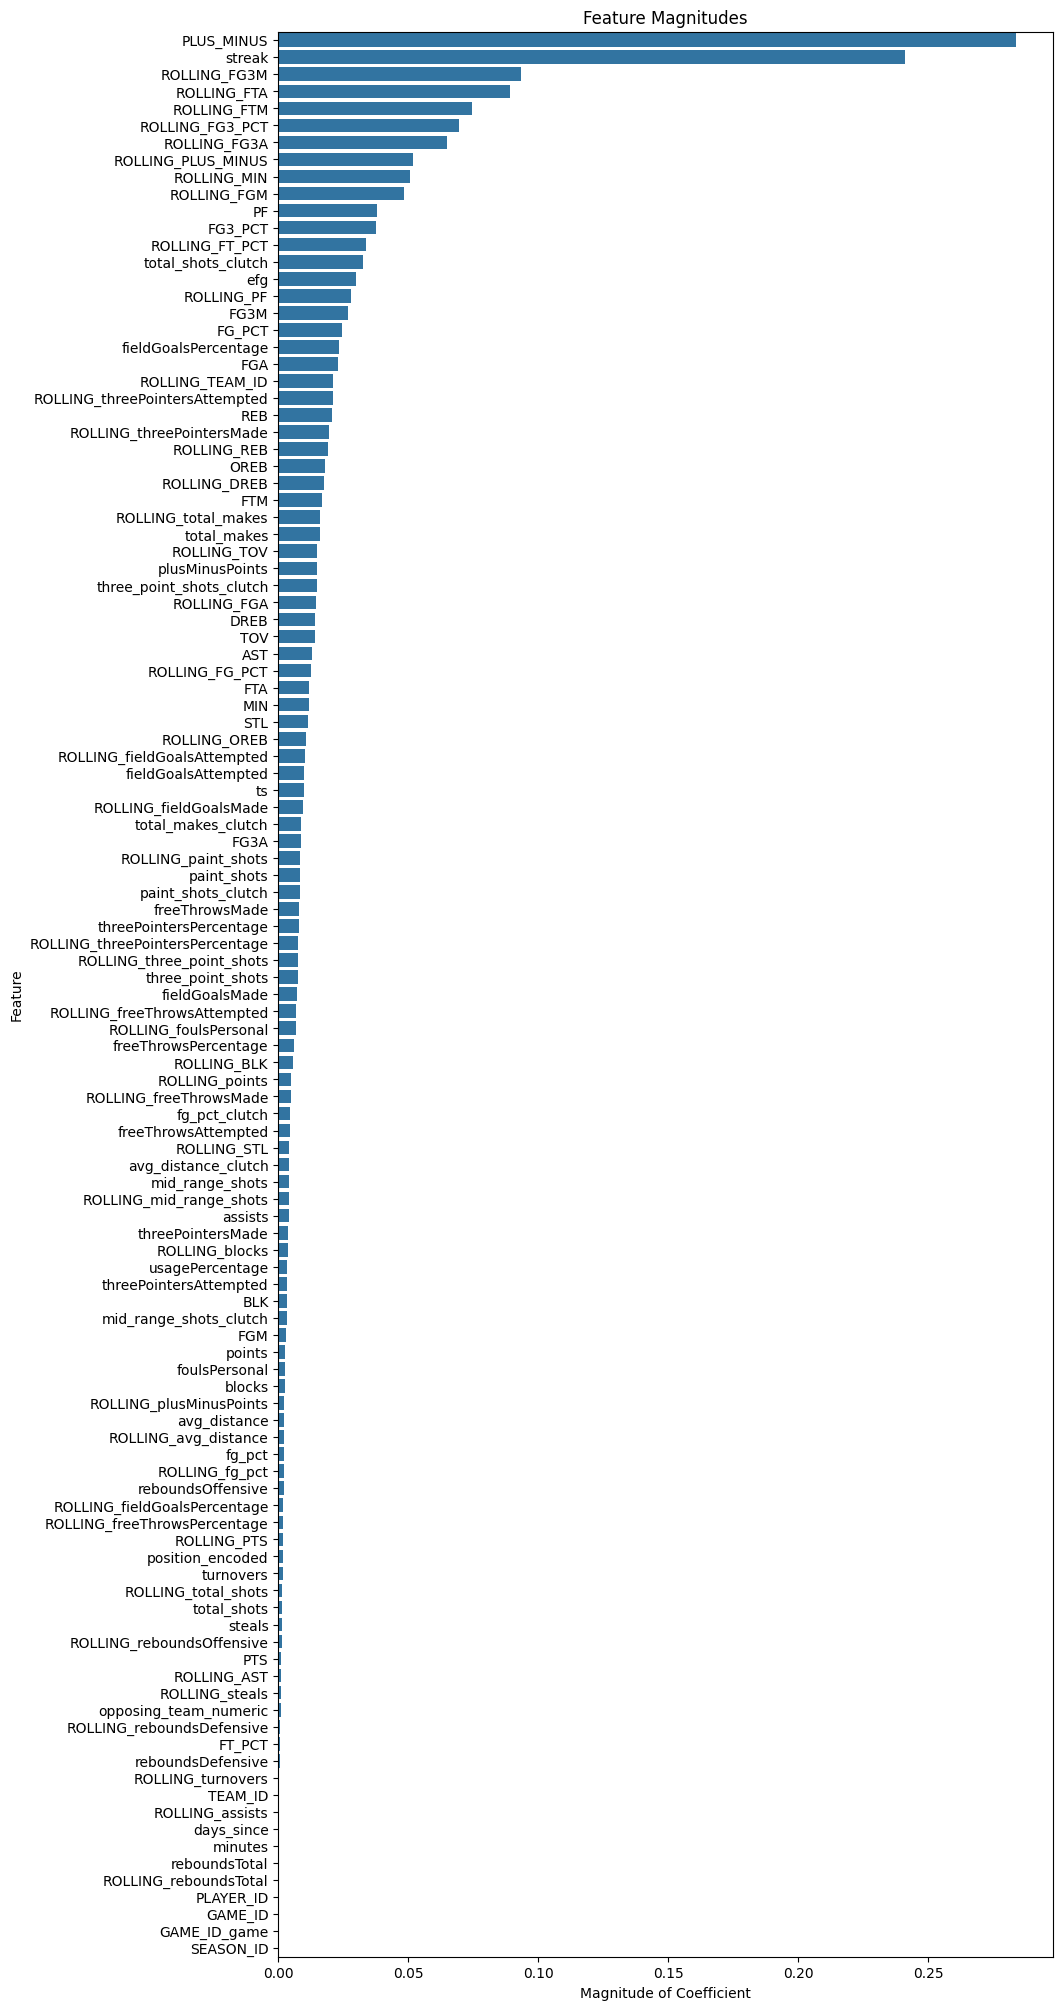

In [11]:
# plot 
import seaborn as sns

plt.figure(figsize=(10, 25))
sns.barplot(x='Magnitude', y='Feature', data=coef_df)
plt.title('Feature Magnitudes')
plt.xlabel('Magnitude of Coefficient')
plt.ylabel('Feature')
plt.show()

## Multi Output Regression

In [12]:
df = pd.read_csv(data)
df = df.sort_values(by=["PLAYER_ID", "days_since"], ascending=[True, False])
df.head()

,PLAYER_ID,minutes,fieldGoalsMade,fieldGoalsAttempted,fieldGoalsPercentage,threePointersMade,threePointersAttempted,threePointersPercentage,freeThrowsMade,freeThrowsAttempted,...,ROLLING_total_shots,ROLLING_total_makes,ROLLING_fg_pct,ROLLING_paint_shots,ROLLING_mid_range_shots,ROLLING_three_point_shots,ROLLING_avg_distance,position_encoded,days_since,opposing_team_numeric
43,2544,38.150000,1.852511,1.352881,0.922733,1.391096,1.036539,1.038278,-0.112656,0.160297,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1,193,14
44,2544,38.150000,1.852511,1.352881,0.922733,1.391096,1.036539,1.038278,-0.112656,0.160297,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1,193,14
42,2544,32.100000,1.233608,0.713281,1.049731,0.701195,0.079193,1.636055,0.380380,0.963209,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1,191,8
40,2544,34.866667,0.924156,0.873181,0.569959,0.011294,0.398308,0.143403,1.859488,1.766121,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1,185,19
41,2544,34.866667,0.924156,0.873181,0.569959,0.011294,0.398308,0.143403,1.859488,1.766121,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1,185,19


In [13]:
for col in df.columns:
    df[f"prev_{col}"] = df.groupby("PLAYER_ID")[col].shift(1)

df.head()

/var/folders/vl/05t5ksb558l04dj_v01x4f4r0000gn/T/ipykernel_3862/3886727276.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"prev_{col}"] = df.groupby("PLAYER_ID")[col].shift(1)
/var/folders/vl/05t5ksb558l04dj_v01x4f4r0000gn/T/ipykernel_3862/3886727276.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"prev_{col}"] = df.groupby("PLAYER_ID")[col].shift(1)
/var/folders/vl/05t5ksb558l04dj_v01x4f4r0000gn/T/ipykernel_3862/3886727276.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

,PLAYER_ID,minutes,fieldGoalsMade,fieldGoalsAttempted,fieldGoalsPercentage,threePointersMade,threePointersAttempted,threePointersPercentage,freeThrowsMade,freeThrowsAttempted,...,prev_ROLLING_total_shots,prev_ROLLING_total_makes,prev_ROLLING_fg_pct,prev_ROLLING_paint_shots,prev_ROLLING_mid_range_shots,prev_ROLLING_three_point_shots,prev_ROLLING_avg_distance,prev_position_encoded,prev_days_since,prev_opposing_team_numeric
43,2544,38.150000,1.852511,1.352881,0.922733,1.391096,1.036539,1.038278,-0.112656,0.160297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,2544,38.150000,1.852511,1.352881,0.922733,1.391096,1.036539,1.038278,-0.112656,0.160297,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1.0,193.0,14.0
42,2544,32.100000,1.233608,0.713281,1.049731,0.701195,0.079193,1.636055,0.380380,0.963209,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1.0,193.0,14.0
40,2544,34.866667,0.924156,0.873181,0.569959,0.011294,0.398308,0.143403,1.859488,1.766121,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1.0,191.0,8.0
41,2544,34.866667,0.924156,0.873181,0.569959,0.011294,0.398308,0.143403,1.859488,1.766121,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1.0,185.0,19.0


In [14]:
# get player id's and game id's to map them back to data after training
player_ids = df['PLAYER_ID']
game_ids = df['GAME_ID']

# handle first game missing prev_ data
df_clean = df.dropna()
df_clean.head()

,PLAYER_ID,minutes,fieldGoalsMade,fieldGoalsAttempted,fieldGoalsPercentage,threePointersMade,threePointersAttempted,threePointersPercentage,freeThrowsMade,freeThrowsAttempted,...,prev_ROLLING_total_shots,prev_ROLLING_total_makes,prev_ROLLING_fg_pct,prev_ROLLING_paint_shots,prev_ROLLING_mid_range_shots,prev_ROLLING_three_point_shots,prev_ROLLING_avg_distance,prev_position_encoded,prev_days_since,prev_opposing_team_numeric
44,2544,38.150000,1.852511,1.352881,0.922733,1.391096,1.036539,1.038278,-0.112656,0.160297,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1.0,193.0,14.0
42,2544,32.100000,1.233608,0.713281,1.049731,0.701195,0.079193,1.636055,0.380380,0.963209,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1.0,193.0,14.0
40,2544,34.866667,0.924156,0.873181,0.569959,0.011294,0.398308,0.143403,1.859488,1.766121,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1.0,191.0,8.0
41,2544,34.866667,0.924156,0.873181,0.569959,0.011294,0.398308,0.143403,1.859488,1.766121,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1.0,185.0,19.0
38,2544,36.050000,1.543059,1.512782,0.569959,2.080997,1.355655,1.292423,-0.112656,0.160297,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1.0,185.0,19.0


In [15]:
# set up features and target for training
X = df_clean[[col for col in df_clean.columns if col.startswith("prev_")]]
X = X.drop(columns=['prev_PLAYER_ID', 'prev_GAME_ID', 'prev_GAME_ID_game'])
y = df_clean[[col for col in df_clean.columns if not col.startswith("prev_")]]
y = y.drop(columns=['PLAYER_ID', 'GAME_ID', 'GAME_ID_game'])

X.head()

,prev_minutes,prev_fieldGoalsMade,prev_fieldGoalsAttempted,prev_fieldGoalsPercentage,prev_threePointersMade,prev_threePointersAttempted,prev_threePointersPercentage,prev_freeThrowsMade,prev_freeThrowsAttempted,prev_freeThrowsPercentage,...,prev_ROLLING_total_shots,prev_ROLLING_total_makes,prev_ROLLING_fg_pct,prev_ROLLING_paint_shots,prev_ROLLING_mid_range_shots,prev_ROLLING_three_point_shots,prev_ROLLING_avg_distance,prev_position_encoded,prev_days_since,prev_opposing_team_numeric
44,38.150000,1.852511,1.352881,0.922733,1.391096,1.036539,1.038278,-0.112656,0.160297,0.400106,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1.0,193.0,14.0
42,38.150000,1.852511,1.352881,0.922733,1.391096,1.036539,1.038278,-0.112656,0.160297,0.400106,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1.0,193.0,14.0
40,32.100000,1.233608,0.713281,1.049731,0.701195,0.079193,1.636055,0.380380,0.963209,0.400106,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1.0,191.0,8.0
41,34.866667,0.924156,0.873181,0.569959,0.011294,0.398308,0.143403,1.859488,1.766121,1.191791,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1.0,185.0,19.0
38,34.866667,0.924156,0.873181,0.569959,0.011294,0.398308,0.143403,1.859488,1.766121,1.191791,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1.0,185.0,19.0


In [16]:
y.head()

,minutes,fieldGoalsMade,fieldGoalsAttempted,fieldGoalsPercentage,threePointersMade,threePointersAttempted,threePointersPercentage,freeThrowsMade,freeThrowsAttempted,freeThrowsPercentage,...,ROLLING_total_shots,ROLLING_total_makes,ROLLING_fg_pct,ROLLING_paint_shots,ROLLING_mid_range_shots,ROLLING_three_point_shots,ROLLING_avg_distance,position_encoded,days_since,opposing_team_numeric
44,38.150000,1.852511,1.352881,0.922733,1.391096,1.036539,1.038278,-0.112656,0.160297,0.400106,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1,193,14
42,32.100000,1.233608,0.713281,1.049731,0.701195,0.079193,1.636055,0.380380,0.963209,0.400106,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1,191,8
40,34.866667,0.924156,0.873181,0.569959,0.011294,0.398308,0.143403,1.859488,1.766121,1.191791,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1,185,19
41,34.866667,0.924156,0.873181,0.569959,0.011294,0.398308,0.143403,1.859488,1.766121,1.191791,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1,185,19
38,36.050000,1.543059,1.512782,0.569959,2.080997,1.355655,1.292423,-0.112656,0.160297,0.400106,...,2.350633,2.595792,0.621998,2.252814,3.320864,1.610438,0.136142,1,183,18


In [17]:
# split data
split_index = int(len(df_clean) * 0.8) 
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

In [18]:
# try removing team id
X_train = X_train.drop(columns=['prev_TEAM_ID'])
X_test = X_test.drop(columns=['prev_TEAM_ID'])
y_train = y_train.drop(columns=['TEAM_ID'])
y_test = y_test.drop(columns=['TEAM_ID'])
X_train = X_train.drop(columns=['prev_ROLLING_TEAM_ID'])
X_test = X_test.drop(columns=['prev_ROLLING_TEAM_ID'])
y_train = y_train.drop(columns=['ROLLING_TEAM_ID'])
y_test = y_test.drop(columns=['ROLLING_TEAM_ID'])

In [19]:
# model training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
X_train.shape

(8116, 109)

In [21]:
# model prediction and eval
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error: 2.8274626130483487
R-squared: 0.6711331462792848
Mean Absolute Error (MAE): 0.45686891041633443


In [22]:
# check adjusted r2 results
def adjusted_r2(r2, n, p):
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

n = X_test.shape[0]  # samples
p = X_test.shape[1]  # predictors

adj_r2 = adjusted_r2(r2_score(y_test, y_pred), n, p)
print(f"Adjusted R-squared: {adj_r2}")

Adjusted R-squared: 0.6524533718886866


In [23]:
# check r2 for different values
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)

r2_per_output = {col: r2_score(y_test_np[:, i], y_pred_np[:, i]) for i, col in enumerate(y_test.columns)}
sorted_r2 = sorted(r2_per_output.items(), key=lambda x: x[1], reverse=True)
for col, r2 in sorted_r2:
    print(f"R² for {col}: {r2:.3f}")

R² for total_shots: 1.000
R² for total_makes: 1.000
R² for fg_pct: 1.000
R² for paint_shots: 1.000
R² for mid_range_shots: 1.000
R² for three_point_shots: 1.000
R² for avg_distance: 1.000
R² for total_shots_clutch: 1.000
R² for total_makes_clutch: 1.000
R² for fg_pct_clutch: 1.000
R² for paint_shots_clutch: 1.000
R² for mid_range_shots_clutch: 1.000
R² for three_point_shots_clutch: 1.000
R² for avg_distance_clutch: 1.000
R² for ROLLING_total_shots: 1.000
R² for ROLLING_total_makes: 1.000
R² for ROLLING_fg_pct: 1.000
R² for ROLLING_paint_shots: 1.000
R² for ROLLING_mid_range_shots: 1.000
R² for ROLLING_three_point_shots: 1.000
R² for ROLLING_avg_distance: 1.000
R² for days_since: 0.959
R² for ROLLING_MIN: 0.898
R² for ROLLING_threePointersAttempted: 0.882
R² for ROLLING_FGM: 0.881
R² for ROLLING_fieldGoalsAttempted: 0.876
R² for ROLLING_PTS: 0.871
R² for ROLLING_reboundsTotal: 0.862
R² for ROLLING_AST: 0.856
R² for ROLLING_FGA: 0.845
R² for ROLLING_points: 0.845
R² for ROLLING_reboundsO

In [24]:
# feature importance
coefs = model.coef_[0]

feature_names = X_train.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})
coef_df['Magnitude'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Magnitude', ascending=False)

coef_df.to_csv('feature_weights_multi_regression.csv', index=False)

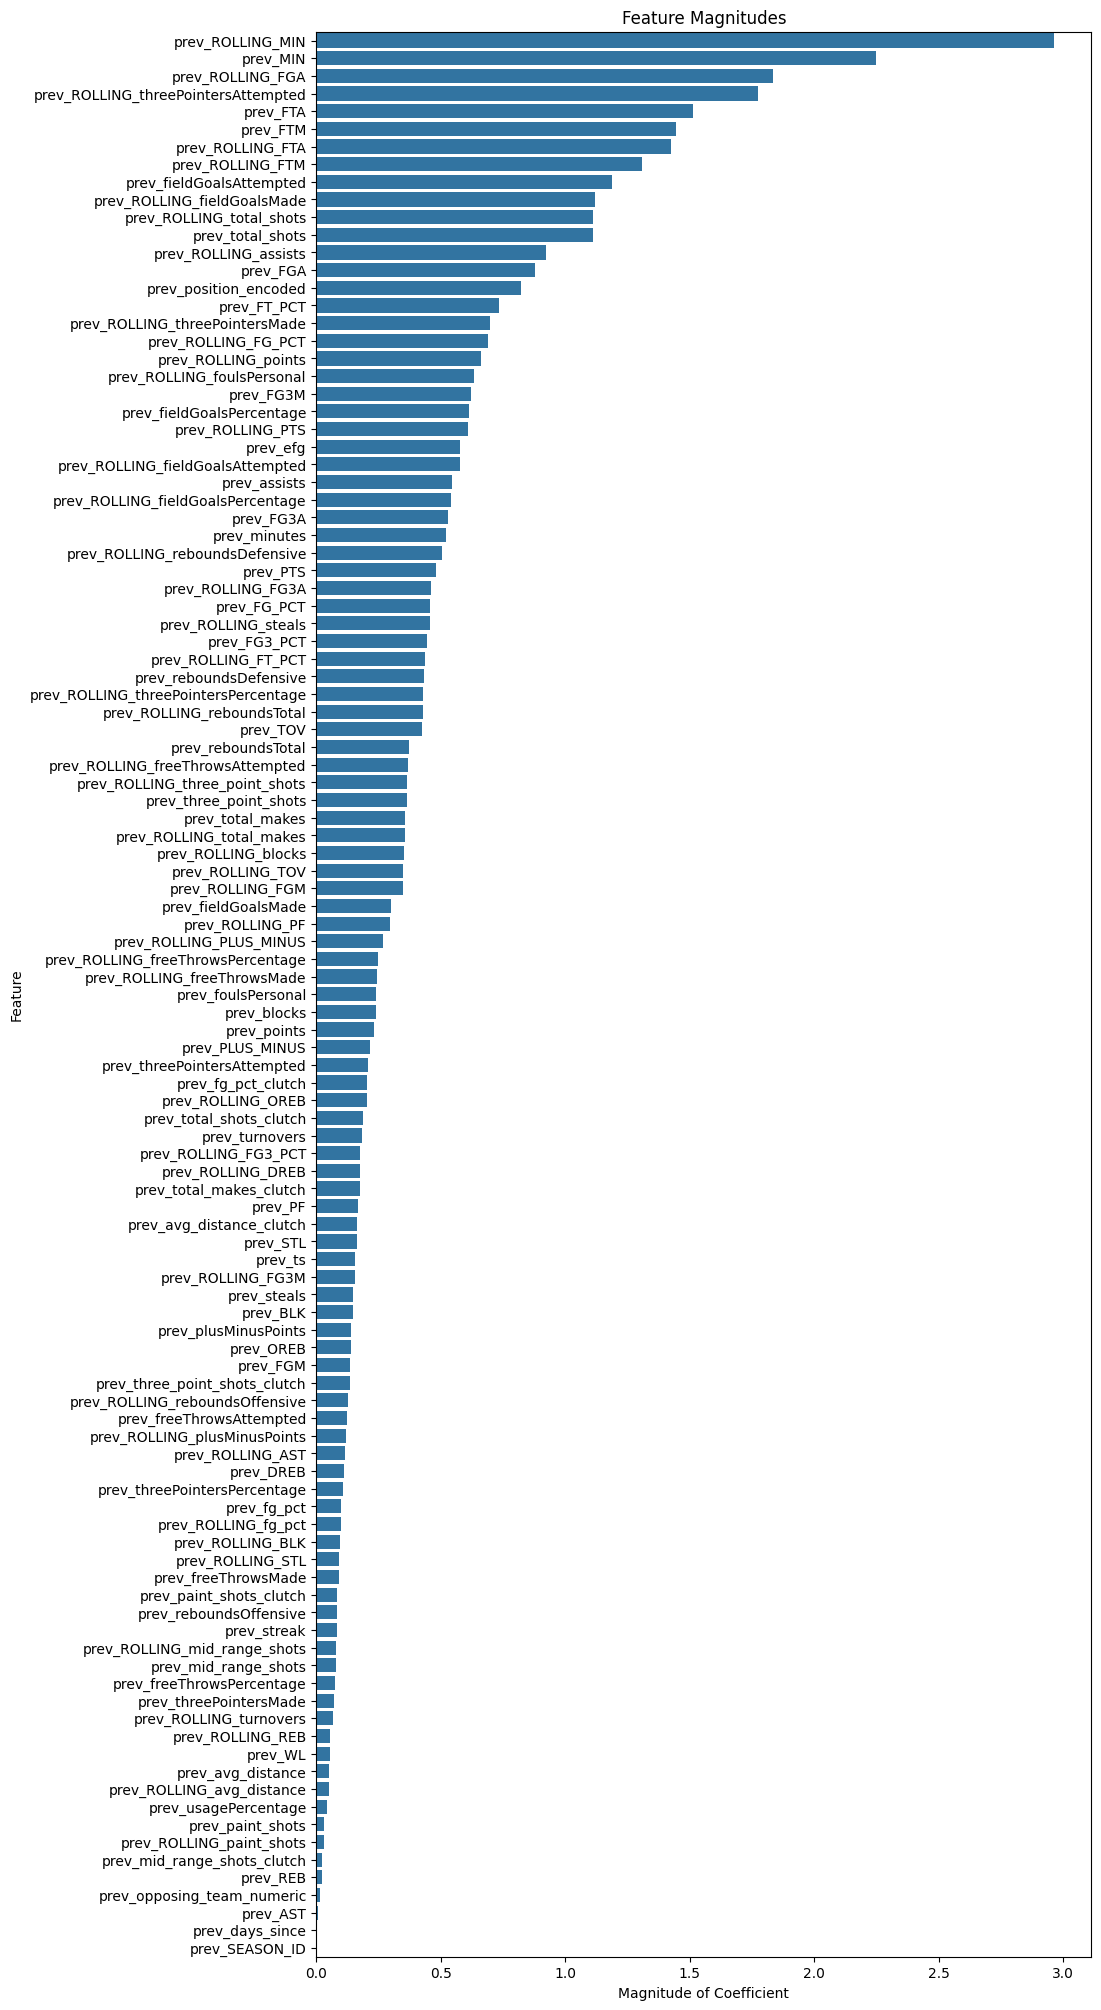

In [25]:
plt.figure(figsize=(10, 25))
sns.barplot(x='Magnitude', y='Feature', data=coef_df)
plt.title('Feature Magnitudes')
plt.xlabel('Magnitude of Coefficient')
plt.ylabel('Feature')
plt.show()

In [26]:
# feature correlation
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = X.corr()

In [27]:
# examine correlations further
mask = np.triu(np.ones_like(corr, dtype=bool))
corr = corr.where(~mask)

corr_pairs = corr.stack().reset_index()
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

corr_pairs = corr_pairs.dropna(subset=['Correlation'])
threshold = 0.7
corr_pairs = corr_pairs[abs(corr_pairs['Correlation']) >= threshold]

corr_pairs['Abs Correlation'] = corr_pairs['Correlation'].abs()
corr_pairs = corr_pairs.sort_values(by='Abs Correlation', ascending=False)

corr_pairs


,Feature 1,Feature 2,Correlation,Abs Correlation
5402,prev_ROLLING_mid_range_shots,prev_mid_range_shots,1.000000,1.000000
5298,prev_ROLLING_paint_shots,prev_paint_shots,1.000000,1.000000
5507,prev_ROLLING_three_point_shots,prev_three_point_shots,1.000000,1.000000
5195,prev_ROLLING_fg_pct,prev_fg_pct,1.000000,1.000000
4992,prev_ROLLING_total_shots,prev_total_shots,1.000000,1.000000
...,...,...,...,...
2791,prev_ROLLING_turnovers,prev_turnovers,0.704426,0.704426
5027,prev_ROLLING_total_shots,prev_ROLLING_points,0.702395,0.702395
2968,prev_ROLLING_points,prev_total_shots,0.702395,0.702395
4929,prev_ROLLING_PLUS_MINUS,prev_ROLLING_plusMinusPoints,0.702162,0.702162


In [28]:
corr_pairs.to_csv('high_corr_vals.csv', index=False)

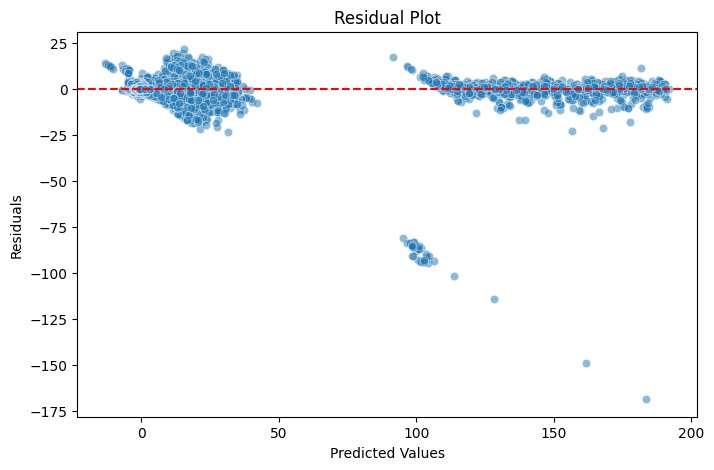

In [29]:
# residuals
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure residuals and predictions are 1D arrays
y_pred_array = y_pred.ravel()
residuals = (y_test.to_numpy().ravel() - y_pred_array)

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_array, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='dashed')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()




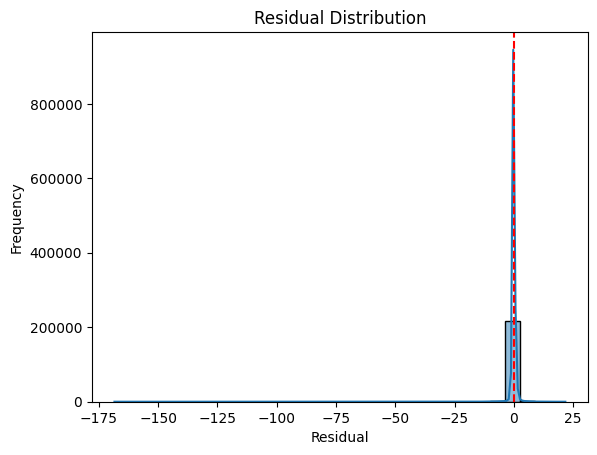

In [30]:
# investigate predictio errors
sns.histplot(residuals.flatten(), bins=30, kde=True)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.axvline(x=0, color='r', linestyle='dashed')

In [31]:
# compare to baseline model
# dummy model always predicts mean

from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
dummy_preds = dummy.predict(X_test)

baseline_mse = mean_squared_error(y_test, dummy_preds)
print(f"Baseline MSE (Mean Prediction): {baseline_mse}")

Baseline MSE (Mean Prediction): 58.32996502338545


## Decision Tree Regression

In [32]:
from sklearn.tree import DecisionTreeRegressor

# initialize model
dt_model = DecisionTreeRegressor(max_depth=5)

In [33]:
# train
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [34]:
# predict
y_pred_dt = dt_model.predict(X_test)

# evaluate
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Mean Squared Error: {mse_dt}")
print(f"Decision Tree Mean Absolute Error: {mae_dt}")
print(f"Decision Tree R-squared: {r2_dt}")

Decision Tree Mean Squared Error: 3.9477531102918575
Decision Tree Mean Absolute Error: 0.775357252981448
Decision Tree R-squared: -23.61062227172853


In [35]:
# get feature importance
feature_importances = pd.DataFrame(dt_model.feature_importances_, 
                                   index=X_train.columns, 
                                   columns=['Importance']).sort_values('Importance', ascending=False)

feature_importances


,Importance
prev_days_since,0.963753
prev_ROLLING_fieldGoalsAttempted,0.023829
prev_minutes,0.008370
prev_ROLLING_MIN,0.002803
prev_ROLLING_points,0.000234
...,...
prev_FT_PCT,0.000000
prev_FTA,0.000000
prev_FTM,0.000000
prev_FG3_PCT,0.000000


In [36]:
feature_importances.to_csv('feature_importance_tree.csv')

In [37]:
print(f"Tree Depth: {dt_model.get_depth()}")

Tree Depth: 5


In [38]:
print(X_train.var())  # Check the variance of each feature
print(y_train.var())  # Check the variance of each target

prev_minutes                        85.665552
prev_fieldGoalsMade                  1.025119
prev_fieldGoalsAttempted             0.892868
prev_fieldGoalsPercentage            0.589915
prev_threePointersMade               1.258836
                                     ...     
prev_ROLLING_three_point_shots       1.269435
prev_ROLLING_avg_distance            0.761537
prev_position_encoded                1.096994
prev_days_since                   1409.729041
prev_opposing_team_numeric          69.012808
Length: 109, dtype: float64
minutes                        83.913405
fieldGoalsMade                  1.013727
fieldGoalsAttempted             0.885145
fieldGoalsPercentage            0.584218
threePointersMade               1.249420
                                ...     
ROLLING_three_point_shots       1.269435
ROLLING_avg_distance            0.761537
position_encoded                1.100019
days_since                   1417.297611
opposing_team_numeric          69.272554
Length: 109, dt

In [39]:
import pandas as pd

# Calculate the variance for each feature
variance = X_train.var()

# Convert the variance to a DataFrame
variance_df = variance.reset_index() 
variance_df.columns = ['Feature', 'Variance']

# Save the variance DataFrame to a CSV
variance_df.to_csv('feature_variance.csv', index=False)

In [40]:
X_train.describe()

,prev_minutes,prev_fieldGoalsMade,prev_fieldGoalsAttempted,prev_fieldGoalsPercentage,prev_threePointersMade,prev_threePointersAttempted,prev_threePointersPercentage,prev_freeThrowsMade,prev_freeThrowsAttempted,prev_freeThrowsPercentage,...,prev_ROLLING_total_shots,prev_ROLLING_total_makes,prev_ROLLING_fg_pct,prev_ROLLING_paint_shots,prev_ROLLING_mid_range_shots,prev_ROLLING_three_point_shots,prev_ROLLING_avg_distance,prev_position_encoded,prev_days_since,prev_opposing_team_numeric
count,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,...,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000
mean,25.438597,0.486478,0.519355,0.428976,0.360579,0.428427,0.311280,0.303654,0.303251,0.344453,...,0.515108,0.515515,0.232730,0.423311,0.363358,0.430036,0.144457,1.989527,144.975604,16.131838
std,9.255569,1.012482,0.944917,0.768059,1.121978,1.031051,1.000755,1.156867,1.136563,1.034033,...,1.024435,1.037318,0.744785,1.080109,1.206209,1.126692,0.872661,1.047375,37.546359,8.307395
min,0.783333,-0.932554,-0.885721,-1.193910,-0.678607,-0.878153,-0.751472,-0.605692,-0.642614,-0.788610,...,-1.023012,-0.992411,-2.216891,-0.906185,-0.618586,-0.810810,-1.825464,0.000000,0.000000,0.000000
25%,18.916667,-0.313651,-0.246120,-0.019173,-0.678607,-0.239923,-0.751472,-0.605692,-0.642614,-0.788610,...,-0.268159,-0.274770,0.104725,-0.412185,-0.482743,-0.490821,-0.249519,1.000000,126.000000,9.000000
50%,26.225000,0.305253,0.393480,0.453544,0.011294,0.398308,0.272265,-0.112656,0.160297,0.400106,...,0.419221,0.416615,0.283485,0.159814,-0.129551,0.202488,0.344196,2.000000,148.000000,16.000000
75%,33.000000,1.233608,1.192981,0.862761,0.701195,1.036539,1.038278,0.873416,0.963209,1.588822,...,1.174074,1.256780,0.527654,0.965814,0.739845,1.013126,0.733021,3.000000,173.000000,24.000000
max,50.483333,5.875382,5.190486,2.333828,6.220403,5.504155,2.828028,7.775923,9.795237,1.588822,...,3.236215,3.716011,3.322404,5.827813,9.623982,3.978355,1.969845,3.000000,194.000000,31.000000


In [41]:
# tree is not creating any splits, so scale large mean values
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()
X_train['prev_days_since'] = scaler.fit_transform(X_train[['prev_days_since']])
X_test['prev_days_since'] = scaler.transform(X_test[['prev_days_since']])

X_train['prev_minutes'] = scaler.fit_transform(X_train[['prev_minutes']])
X_test['prev_minutes'] = scaler.transform(X_test[['prev_minutes']])


In [42]:
X_test.describe()

,prev_minutes,prev_fieldGoalsMade,prev_fieldGoalsAttempted,prev_fieldGoalsPercentage,prev_threePointersMade,prev_threePointersAttempted,prev_threePointersPercentage,prev_freeThrowsMade,prev_freeThrowsAttempted,prev_freeThrowsPercentage,...,prev_ROLLING_total_shots,prev_ROLLING_total_makes,prev_ROLLING_fg_pct,prev_ROLLING_paint_shots,prev_ROLLING_mid_range_shots,prev_ROLLING_three_point_shots,prev_ROLLING_avg_distance,prev_position_encoded,prev_days_since,prev_opposing_team_numeric
count,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,...,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000
mean,0.385932,-0.006487,0.059652,0.303075,-0.008087,0.087214,0.105627,-0.019589,0.010518,0.096010,...,-0.262391,-0.290001,-0.194515,-0.163808,-0.248455,-0.258008,-0.091294,2.244948,0.553508,16.714145
std,0.183218,0.754530,0.734030,0.901087,0.900277,0.891785,1.053979,0.840574,0.863505,0.995670,...,0.682120,0.642558,1.081701,0.815670,0.535182,0.665188,1.058674,1.032810,0.344585,7.870507
min,-0.009390,-0.932554,-0.885721,-1.193910,-0.678607,-0.878153,-0.751472,-0.605692,-0.642614,-0.788610,...,-1.023012,-0.992411,-2.216891,-0.906185,-0.618586,-0.810810,-1.825464,0.000000,0.000000,0.000000
25%,0.252180,-0.623102,-0.565921,-0.311975,-0.678607,-0.559038,-0.751472,-0.605692,-0.642614,-0.788610,...,-0.942888,-0.922397,-0.370459,-0.841185,-0.618586,-0.789477,-0.882406,1.000000,0.072165,12.000000
50%,0.387324,-0.313651,-0.086220,0.319490,0.011294,-0.239923,-0.239604,-0.605692,-0.241158,-0.788610,...,-0.331415,-0.344784,0.107289,-0.308186,-0.482743,-0.533486,0.157828,3.000000,0.670103,17.000000
75%,0.521462,0.305253,0.393480,0.820428,0.011294,0.398308,0.680328,0.380380,0.160297,0.994464,...,0.216803,0.092802,0.327320,0.237814,-0.102382,0.138490,0.692227,3.000000,0.824742,24.000000
max,0.845070,3.399769,3.751384,2.333828,5.530502,5.185039,2.828028,6.296814,5.780679,1.588822,...,2.240990,2.236972,3.322404,2.278814,2.668817,2.815729,2.273470,3.000000,1.000000,31.000000


In [43]:
# second run of dt model
dt_model = DecisionTreeRegressor(random_state=42)

In [44]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [45]:
# predict
y_pred_dt = dt_model.predict(X_test)

# evaluate
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Mean Squared Error: {mse_dt}")
print(f"Decision Tree Mean Absolute Error: {mae_dt}")
print(f"Decision Tree R-squared: {r2_dt}")

Decision Tree Mean Squared Error: 4.163027316803647
Decision Tree Mean Absolute Error: 0.8130730366456898
Decision Tree R-squared: -0.23941743330131743


In [46]:
print(f"Tree Depth: {dt_model.get_depth()}")

Tree Depth: 25


In [47]:
# dt model with more lax parameters
dt_model = DecisionTreeRegressor(max_depth=None, 
                                 min_samples_split=2, 
                                 min_samples_leaf=1)

In [48]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [49]:
print(f"Tree Depth: {dt_model.get_depth()}")

Tree Depth: 25


In [50]:
# Calculate the variance for each feature
variance = y_train.var()

# Convert the variance to a DataFrame
variance_df = variance.reset_index()  # Resetting the index to make the feature names a column
variance_df.columns = ['Feature', 'Variance']  # Rename the columns for clarity

# Save the variance DataFrame to a CSV
variance_df.to_csv('target_variance.csv', index=False)

In [51]:
# tree is not creating any splits, so scale large mean values for y
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
y_train['days_since'] = scaler.fit_transform(y_train[['days_since']])
y_test['days_since'] = scaler.transform(y_test[['days_since']])

y_train['minutes'] = scaler.fit_transform(y_train[['minutes']])
y_test['minutes'] = scaler.transform(y_test[['minutes']])

In [52]:
y_train.describe()

,minutes,fieldGoalsMade,fieldGoalsAttempted,fieldGoalsPercentage,threePointersMade,threePointersAttempted,threePointersPercentage,freeThrowsMade,freeThrowsAttempted,freeThrowsPercentage,...,ROLLING_total_shots,ROLLING_total_makes,ROLLING_fg_pct,ROLLING_paint_shots,ROLLING_mid_range_shots,ROLLING_three_point_shots,ROLLING_avg_distance,position_encoded,days_since,opposing_team_numeric
count,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,...,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000
mean,0.497029,0.488499,0.521601,0.432122,0.363300,0.432084,0.317123,0.309851,0.311165,0.348150,...,0.515108,0.515515,0.232730,0.423311,0.363358,0.430036,0.144457,1.993470,0.737479,16.142681
std,0.184314,1.006840,0.940821,0.764341,1.117775,1.024705,1.003051,1.158685,1.139625,1.032505,...,1.024435,1.037318,0.744785,1.080109,1.206209,1.126692,0.872661,1.048818,0.195062,8.323014
min,0.000000,-0.932554,-0.885721,-1.193910,-0.678607,-0.878153,-0.751472,-0.605692,-0.642614,-0.788610,...,-1.023012,-0.992411,-2.216891,-0.906185,-0.618586,-0.810810,-1.825464,0.000000,0.000000,0.000000
25%,0.367539,-0.313651,-0.246120,-0.019173,-0.678607,-0.239923,-0.751472,-0.605692,-0.642614,-0.788610,...,-0.268159,-0.274770,0.104725,-0.412185,-0.482743,-0.490821,-0.249519,1.000000,0.637306,9.000000
50%,0.511737,0.305253,0.393480,0.453544,0.011294,0.398308,0.272265,-0.112656,0.160297,0.400106,...,0.419221,0.416615,0.283485,0.159814,-0.129551,0.202488,0.344196,2.000000,0.746114,16.000000
75%,0.646881,1.233608,1.192981,0.862761,0.701195,1.036539,1.038278,0.873416,0.963209,1.588822,...,1.174074,1.256780,0.527654,0.965814,0.739845,1.013126,0.733021,3.000000,0.880829,24.000000
max,1.000000,5.875382,5.190486,2.333828,6.220403,5.504155,2.828028,7.775923,9.795237,1.588822,...,3.236215,3.716011,3.322404,5.827813,9.623982,3.978355,1.969845,3.000000,1.000000,31.000000


In [53]:
# attempt dt with scaled y features
dt_model = DecisionTreeRegressor(max_depth=None, 
                                 min_samples_split=2, 
                                 min_samples_leaf=1)

In [54]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [55]:
print(f"Tree Depth: {dt_model.get_depth()}")

Tree Depth: 29


In [56]:
# try dropping unnecessary features (low variance)
X_train = X_train.drop(columns=['prev_SEASON_ID'])
X_test = X_test.drop(columns=['prev_SEASON_ID'])
y_train = y_train.drop(columns=['SEASON_ID'])
y_test = y_test.drop(columns=['SEASON_ID'])

In [57]:
# test new dataset with dropped features
dt_model = DecisionTreeRegressor(max_depth=None, 
                                 min_samples_split=2, 
                                 min_samples_leaf=1)

In [58]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [59]:
print(f"Tree Depth: {dt_model.get_depth()}")

Tree Depth: 29


In [60]:
X_train.var()

prev_minutes                       0.034681
prev_fieldGoalsMade                1.025119
prev_fieldGoalsAttempted           0.892868
prev_fieldGoalsPercentage          0.589915
prev_threePointersMade             1.258836
                                    ...    
prev_ROLLING_three_point_shots     1.269435
prev_ROLLING_avg_distance          0.761537
prev_position_encoded              1.096994
prev_days_since                    0.037457
prev_opposing_team_numeric        69.012808
Length: 108, dtype: float64

In [61]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [62]:
print("Tree Depth:", tree.get_depth())
print("Number of Leaves:", tree.get_n_leaves())
print("Feature Importances:", tree.feature_importances_)

Tree Depth: 29
Number of Leaves: 8116
Feature Importances: [0.00515131 0.00219005 0.00251249 0.00279996 0.00207337 0.00238029
 0.0030669  0.00231595 0.00326699 0.0022937  0.00222875 0.00258634
 0.0034152  0.0020829  0.00139181 0.00154458 0.0023674  0.00242097
 0.00491596 0.00511967 0.0003439  0.0028807  0.00505246 0.00463029
 0.01088038 0.00823168 0.00522561 0.00924384 0.00747895 0.00659351
 0.00813341 0.01310486 0.00551459 0.00541914 0.00600485 0.00731933
 0.00663129 0.0055844  0.00861553 0.00686364 0.00887481 0.01974566
 0.00211874 0.01012545 0.00430309 0.00583747 0.00592135 0.02315077
 0.00455167 0.00330001 0.0048985  0.00798535 0.00170764 0.00227422
 0.01456202 0.00353993 0.00399372 0.0086782  0.00580006 0.0054791
 0.01329773 0.00857912 0.00553782 0.01061924 0.00764799 0.00567166
 0.00823352 0.00497599 0.00603331 0.00814695 0.00903641 0.00421894
 0.00553978 0.00337187 0.00642784 0.00637436 0.02485855 0.01078337
 0.00687934 0.01053138 0.0149775  0.01569949 0.01661584 0.0142455
 0.02

In [63]:
unique_counts = X_train.nunique()
constant_columns = unique_counts[unique_counts == 1].index.tolist()
constant_columns

[]

In [64]:
unique_counts = y_train.nunique()
constant_columns = unique_counts[unique_counts == 1].index.tolist()
constant_columns

[]

In [65]:
print(tree.get_params())

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


In [66]:
print(X_train.drop_duplicates().shape)
print(X_train.shape)

(8116, 108)
(8116, 108)


In [67]:
low_var_features = X_train.var()[X_train.var() < 1e-6].index
print("Low variance features:", low_var_features.tolist())

Low variance features: []


In [68]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [69]:
import pandas as pd

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display the top features
feature_importance_df

,Feature,Importance
41,prev_total_shots,0.057577
98,prev_ROLLING_total_shots,0.051872
107,prev_opposing_team_numeric,0.043729
76,prev_ROLLING_points,0.025962
84,prev_ROLLING_FG3A,0.021304
...,...,...
105,prev_position_encoded,0.002386
14,prev_steals,0.002188
4,prev_threePointersMade,0.002061
15,prev_blocks,0.001703


In [70]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [71]:
print("Tree Depth:", tree.get_depth())
print("Number of Leaves:", tree.get_n_leaves())
print("Feature Importances:", tree.feature_importances_)

Tree Depth: 29
Number of Leaves: 8116
Feature Importances: [0.00515131 0.00219005 0.00251249 0.00279996 0.00207337 0.00238029
 0.0030669  0.00231595 0.00326699 0.0022937  0.00222875 0.00258634
 0.0034152  0.0020829  0.00139181 0.00154458 0.0023674  0.00242097
 0.00491596 0.00511967 0.0003439  0.0028807  0.00505246 0.00463029
 0.01088038 0.00823168 0.00522561 0.00924384 0.00747895 0.00659351
 0.00813341 0.01310486 0.00551459 0.00541914 0.00600485 0.00731933
 0.00663129 0.0055844  0.00861553 0.00686364 0.00887481 0.01974566
 0.00211874 0.01012545 0.00430309 0.00583747 0.00592135 0.02315077
 0.00455167 0.00330001 0.0048985  0.00798535 0.00170764 0.00227422
 0.01456202 0.00353993 0.00399372 0.0086782  0.00580006 0.0054791
 0.01329773 0.00857912 0.00553782 0.01061924 0.00764799 0.00567166
 0.00823352 0.00497599 0.00603331 0.00814695 0.00903641 0.00421894
 0.00553978 0.00337187 0.00642784 0.00637436 0.02485855 0.01078337
 0.00687934 0.01053138 0.0149775  0.01569949 0.01661584 0.0142455
 0.02

In [72]:
# predict
y_pred_dt = tree.predict(X_test)

# evaluate
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Mean Squared Error: {mse_dt}")
print(f"Decision Tree Mean Absolute Error: {mae_dt}")
print(f"Decision Tree R-squared: {r2_dt}")

Decision Tree Mean Squared Error: 1.6639490188990829
Decision Tree Mean Absolute Error: 0.6868497898855371
Decision Tree R-squared: -0.1524128702699182


## overall metrics
#### linear regression
Linear Regression MSE: 2.74380556440852  
Linear Regression MAE: 0.44905067720033665  
Linear Regression R-squared: 0.6771137567184669  
#### decision tree 
Decision Tree Mean Squared Error: 1.6639490188990829  
Decision Tree Mean Absolute Error: 0.6868497898855371  
Decision Tree R-squared: -0.1524128702699182  
#### mean
Dummy Model MSE: 1.5141528117168594  
Dummy Model MAE: 0.8306213233566019  
Dummy Model R-squared: -0.2698537576335025  

In [73]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# check dummy that predicts mean
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

# evaluate
mse_dummy = mean_squared_error(y_test, y_pred_dummy)
mae_dummy = mean_absolute_error(y_test, y_pred_dummy)
r2_dummy = r2_score(y_test, y_pred_dummy)

print(f"Dummy Model MSE: {mse_dummy}")
print(f"Dummy Model MAE: {mae_dummy}")
print(f"Dummy Model R-squared: {r2_dummy}")

Dummy Model MSE: 1.5141528117168594
Dummy Model MAE: 0.8306213233566019
Dummy Model R-squared: -0.2698537576335025


## XG Boost

In [74]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor

In [75]:
# initialize model 
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6, learning_rate=0.1)
multi_output_xgb = MultiOutputRegressor(xgb_model) # wrap model in multi-output regressor to handle multiple outputs

# train 
multi_output_xgb.fit(X_train, y_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))

In [76]:
# predict
y_pred = multi_output_xgb.predict(X_test)

# evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'XGBoost MSE: {mse}')
print(f'XGBoost MAE: {mae}')
print(f'XGBoost R-squared: {r2}')

XGBoost MSE: 0.297848641872406
XGBoost MAE: 0.25626710057258606
XGBoost R-squared: 0.8035615086555481


## overall metrics
#### linear regression
Linear Regression MSE: 2.74380556440852  
Linear Regression MAE: 0.44905067720033665  
Linear Regression R-squared: 0.6771137567184669  
#### decision tree 
Decision Tree MSE: 1.6639490188990829  
Decision Tree MAE: 0.6868497898855371  
Decision Tree R-squared: -0.1524128702699182  
#### xgboost
XGBoost MSE: 0.297848641872406  
XGBoost MAE: 0.25626710057258606  
XGBoost R-squared: 0.8035615086555481  
#### mean
Dummy Model MSE: 1.5141528117168594  
Dummy Model MAE: 0.8306213233566019  
Dummy Model R-squared: -0.2698537576335025  

In [77]:
# check r2 for different values
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)

r2_per_output = {col: r2_score(y_test_np[:, i], y_pred_np[:, i]) for i, col in enumerate(y_test.columns)}
sorted_r2 = sorted(r2_per_output.items(), key=lambda x: x[1], reverse=True)
for col, r2 in sorted_r2:
    print(f"R² for {col}: {r2:.3f}")

R² for mid_range_shots_clutch: 1.000
R² for paint_shots_clutch: 1.000
R² for total_makes_clutch: 1.000
R² for total_makes: 1.000
R² for ROLLING_total_makes: 1.000
R² for three_point_shots_clutch: 1.000
R² for three_point_shots: 1.000
R² for ROLLING_three_point_shots: 1.000
R² for mid_range_shots: 1.000
R² for ROLLING_mid_range_shots: 1.000
R² for paint_shots: 1.000
R² for ROLLING_paint_shots: 1.000
R² for total_shots_clutch: 1.000
R² for avg_distance_clutch: 1.000
R² for total_shots: 1.000
R² for ROLLING_total_shots: 1.000
R² for avg_distance: 0.999
R² for ROLLING_avg_distance: 0.999
R² for fg_pct_clutch: 0.996
R² for fg_pct: 0.993
R² for ROLLING_fg_pct: 0.993
R² for days_since: 0.983
R² for ROLLING_FGM: 0.960
R² for ROLLING_AST: 0.955
R² for ROLLING_FG3A: 0.954
R² for MIN: 0.952
R² for ROLLING_MIN: 0.949
R² for ROLLING_PLUS_MINUS: 0.949
R² for ROLLING_FG3M: 0.948
R² for ROLLING_OREB: 0.944
R² for ROLLING_DREB: 0.944
R² for ROLLING_PTS: 0.941
R² for ROLLING_FGA: 0.938
R² for ROLLING_FG

## NN

In [78]:
import torch
import torch.nn as nn
import torch.optim as optim

In [79]:
import torch
import gc

if 'X_train_tensor' in globals():
    del X_train_tensor
if 'X_train_np' in globals():
    del X_train_np

gc.collect()

# Free unused memory in PyTorch
torch.cuda.empty_cache()  # (Even though you're on CPU/MPS, this can still help)


In [80]:
X_train_np = X_train.to_numpy(dtype=np.float32)
y_train_np = y_train.to_numpy(dtype=np.float32)
X_test_np = X_test.to_numpy(dtype=np.float32)
y_test_np = y_test.to_numpy(dtype=np.float32)

In [81]:
X_train_tensor = torch.from_numpy(X_train_np).float()

In [82]:
y_train_tensor = torch.from_numpy(y_train_np).float()

In [83]:
X_test_tensor = torch.from_numpy(X_test_np).float()
y_test_tensor = torch.from_numpy(y_test_np).float()

In [84]:
# define nn
class MLPModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  
        self.fc2 = nn.Linear(128, 64)         
        self.fc3 = nn.Linear(64, output_dim)  
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [85]:
# get shape of input and output for model
input_dim = X_train_tensor.shape[1]
output_dim = y_train_tensor.shape[1]

In [86]:
# initialize model
model = MLPModel(input_dim, output_dim)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [87]:
# Check that MPS is available
if not torch.backends.mps.is_available():
    if not torch.backends.mps.is_built():
        print("MPS not available because the current PyTorch install was not "
              "built with MPS enabled.")
    else:
        print("MPS not available because the current MacOS version is not 12.3+ "
              "and/or you do not have an MPS-enabled device on this machine.")

else:
    print("MPS available")

MPS available


In [88]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model = model.to(device)
X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

In [89]:
# train model 
num_epochs = 100 
batch_size = 32 

for epoch in range(num_epochs):
    model.train()  
    
    perm = torch.randperm(X_train_tensor.size(0))
    
    for i in range(0, X_train_tensor.size(0), batch_size):
        indices = perm[i:i+batch_size]
        X_batch, y_batch = X_train_tensor[indices], y_train_tensor[indices]
        
        optimizer.zero_grad()
        
        y_pred = model(X_batch)

        loss = loss_fn(y_pred, y_batch)
        
        loss.backward()
        
        optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 0.7818
Epoch [20/100], Loss: 0.6094
Epoch [30/100], Loss: 0.8486
Epoch [40/100], Loss: 0.4662
Epoch [50/100], Loss: 0.4102
Epoch [60/100], Loss: 0.3943
Epoch [70/100], Loss: 0.5053
Epoch [80/100], Loss: 0.3589
Epoch [90/100], Loss: 0.3328
Epoch [100/100], Loss: 0.2945


In [91]:
# evaluate
model.eval()

# make sure X_test_tensor is on the same device as the model
X_test_tensor = X_test_tensor.to(device)

with torch.no_grad():
    y_pred = model(X_test_tensor)

In [92]:
y_pred = y_pred.cpu().numpy()
y_test = y_test_tensor.cpu().numpy()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R² Score: {r2:.4f}')

Mean Squared Error (MSE): 0.6402
Mean Absolute Error (MAE): 0.4032
R² Score: 0.6503


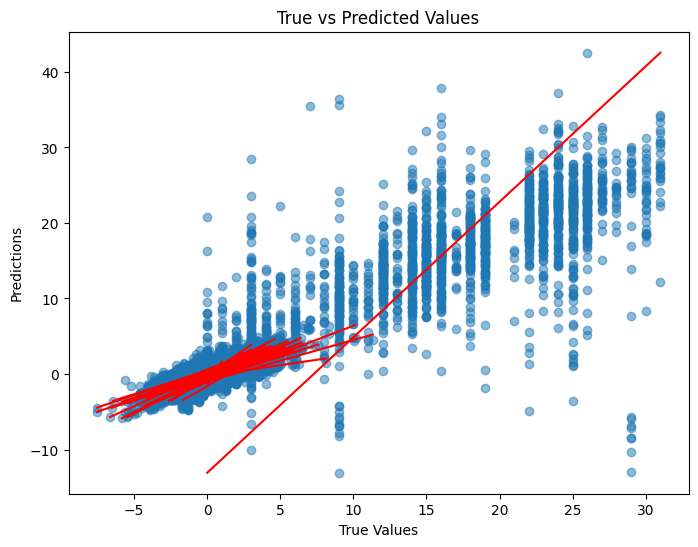

In [94]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
for i in range(y_test.shape[1]):  # assuming y_test has shape (num_samples, num_outputs)
    plt.plot([min(y_test[:, i]), max(y_test[:, i])], [min(y_pred[:, i]), max(y_pred[:, i])], color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

## overall metrics
#### linear regression
Linear Regression MSE: 2.74380556440852  
Linear Regression MAE: 0.44905067720033665  
Linear Regression R-squared: 0.6771137567184669  
#### decision tree 
Decision Tree MSE: 1.6639490188990829  
Decision Tree MAE: 0.6868497898855371  
Decision Tree R-squared: -0.1524128702699182  
#### xgboost
XGBoost MSE: 0.297848641872406  
XGBoost MAE: 0.25626710057258606  
XGBoost R-squared: 0.8035615086555481  
#### nn
NN Mean Squared Error (MSE): 0.6402  
NN Mean Absolute Error (MAE): 0.4032  
NN R-squared Score: 0.6503  
#### mean
Dummy Model MSE: 1.5141528117168594  
Dummy Model MAE: 0.8306213233566019  
Dummy Model R-squared: -0.2698537576335025  